<a href="https://colab.research.google.com/github/rares985/machine-learning/blob/master/multivariate_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Multivariate linear regression


Let's first load the training data from Keras:

In [0]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz",
    test_split=0.2,
    seed=7331
)

m = X_train.shape[0]
n = X_train.shape[1]

theta = np.random.randn(n+1, 1)*np.sqrt(2/m)

Same as before, we added a column of $ 1 $ to serve as the Xs to the biases.
We are also reshaping $ \mathbf{y} $ to be an $ m \times 1 $ matrix instead of a vector, because in NumPy, a ```(m,1)``` matrix(which is $\hat{y}$) minus a ```(m,)``` vector (which is currently $y_{train}$) results in element-wise subtraction and therefore in an $m \times m $ size matrix.


In [50]:
X_intercept = np.hstack((np.ones((X_train.shape[0],1)), X_train))
y_train = y_train.reshape(-1, 1)
print(X_intercept.shape)

(404, 14)


The entire process is visually explained. First we are computing the regressor's
outputs, $\hat{y}$:

$$
\mathbf{\hat{y}}=X_{intercept}\times\boldsymbol{\theta}= 
\begin{bmatrix}
    x_0^{(1)}=1 & \dots & x_n^{(1)} \\
    x_0^{(2)}=1 & \dots & x_n^{(2)} \\
    \vdots &  \ddots & \vdots \\
    x_0^{(m)}=1 & \dots & x_n^{(m)}
\end{bmatrix}
\times
\begin{bmatrix}
    \theta_0 \\
    \theta_1 \\
    \vdots   \\
    \theta_n
\end{bmatrix}
$$

In [0]:
y_hat = X_intercept @ theta

Now we are computing the *error* term $\delta$, which is the difference between the
regressor's output $ \hat{y} $ and the true output, $ y $:
<br><br><br>
$$
\boldsymbol{\delta}=\mathbf{\hat{y}}-\mathbf{y}=
\begin{bmatrix}
    \delta^{(1)} \\
    \delta^{(2)} \\
    \vdots \\
    \delta^{(m)} \\
\end{bmatrix}
=
\begin{bmatrix}
    \hat{y}^{(1)} - y^{(1)} \\
    \hat{y}^{(2)} - y^{(2)}\\
    \vdots   \\
    \hat{y}^{(m)} - y^{(m)}
\end{bmatrix}
$$
<br><br><br>
Cost function is defined as below, and can be written in matrix form depending only on the $\delta$ term:
<br><br><br>
$$
J=\frac{1}{2m}\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)})^2=
\frac{1}{2m}{\boldsymbol{\delta^{T}}}{\boldsymbol{\delta}}=
\frac{1}{2m}\begin{bmatrix}
    \delta^{(1)} &
    \delta^{(2)} &
    \dots &
    \delta^{(m)}
\end{bmatrix}
\begin{bmatrix}
    \delta^{(1)} \\
    \delta^{(2)} \\
    \vdots \\
    \delta^{(m)} \\
\end{bmatrix}
$$

In [0]:
    delta = y_hat - y_train
    J = (delta.T @ delta)/(2*m)

The derivative of $ J $, the cost function, with respect to the weights $\theta$, is computed as below. Since $\theta$ is a multi-dimensional vector,
the matrix $ \nabla $ bears the name of [*gradient*](https://en.wikipedia.org/wiki/Gradient):
<br><br><br>
$$
\nabla_{\theta}J=
\frac{1}{m}
\begin{bmatrix}
    \frac{dJ}{d\theta_0} \\
    \frac{dJ}{d\theta_1} \\
    \vdots \\
    \frac{dJ}{d\theta_n} \\
\end{bmatrix}
=\frac{1}{m}(X_{intercept}^T \times \boldsymbol{\theta})=
\frac{1}{m}
\begin{bmatrix}
    x_0^{(1)}=1  & x_0^{(2)}=1 & \dots & x_0^{(m)}\\
    x_1^{(1)}  & x_1^{(2)} & \dots & x_1^{(m)}\\
    \vdots & \vdots & \ddots & \vdots \\
    x_n^{(1)}  & x_n^{(2)} & \dots & x_n^{(m)}\\
\end{bmatrix}
\times
\begin{bmatrix}
    \delta^{(1)} \\
    \delta^{(2)} \\
    \vdots \\
    \delta^{(m)}
\end{bmatrix}
$$
<br><br><br>
After computing the gradient of $ J $, we are performing the Gradient descent weight update in vector form, since the updates to the individual weights must
be done simultaneously:
<br><br><br>
$$
\boldsymbol{\theta} = \boldsymbol{\theta} - \alpha \cdot \nabla_{\theta}J
$$



In [0]:
    djdw = (X_intercept.T @ delta) * (1/m)
    theta -= learning_rate * djdw

Now wrapping all the operations explained before in a ```for``` clause:

In [55]:
import tqdm
import numpy as np

learning_rate = 1e-6
epochs = 25
# Theta is re-initalized here in case of multiple runs
theta = np.random.randn(n+1, 1)*np.sqrt(2/m)

J_hist = []
for n_ep in tqdm.tqdm(range(epochs)):
    y_hat = X_intercept @ theta

    delta = y_hat - y_train

    J = (delta.T @ delta)/(2*m)
    J_hist.append(J[0, 0])

    djdw = (X_intercept.T @ delta) * (1/m)

    theta -= learning_rate * djdw

100%|██████████| 25/25 [00:00<00:00, 5620.58it/s]


Let's plot the cost function evolution so that we can see it decreases over time:

Text(0, 0.5, 'Cost function')

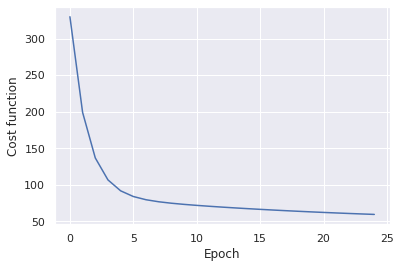

In [56]:
import seaborn as sns
sns.set()

plt.plot(J_hist)
plt.xlabel("Epoch")
plt.ylabel("Cost function")

And now let's check some of the regressor's predictions against the real prices:

In [59]:
import pandas as pd

X_test_intercept = np.hstack((np.ones((X_test.shape[0],1)), X_test))
y_pred = (X_test_intercept @ theta).reshape(X_test.shape[0],)



data = {'Actual price':y_test, 'Predicted price':y_pred}
df = pd.DataFrame(data=data)
df.head(n=10)

,Actual price,Predicted price
0,20.4,21.898676
1,20.6,19.587011
2,20.8,27.819532
3,23.0,30.181237
4,7.2,28.075973
5,23.0,19.462966
6,22.6,25.260326
7,23.6,19.631041
8,21.9,24.732199
9,14.9,24.493940
